# UC San Diego: Neural Data Science
## Final Project Title (change this to your project's title)

## Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [  ] YES - make available
* [  ] NO - keep private

# Names

- Eric Silberman
- Olimpia Carrioli

# Overview

* Write a clear, 3-4 sentence summary of what you did and why.

<a id='research_question'></a>
# Research Question

* One sentence that describes the question you address in your project. Make sure what you’re measuring (variables) to answer your question is clear!


<a id='background'></a>

## Background & Prior Work

* In 2-3 paragraphs, describe the motivation behind your question. What’s the big picture, and why is it interesting? Are there published papers addressing aspects of your question? You should cite at least three primary references here. You are welcome to replicate published papers using publicly available data, just cite them and explain why!

References (include links):
- 1)
- 2)

# Hypothesis


Do patients with the following psychiatric conditions: Depression, Personality disorders, Anxiety disorders, Schizophrenia, Eating disorders, and Addictive behaviors differ in their brain activation patterns as measured by resting-state EEG? 

# Dataset(s)

*Fill in your dataset information here*

(Copy this information for each dataset)
- Dataset Name:
- Link to the dataset:
- Number of observations:

1-2 sentences describing each dataset. 

If you plan to use multiple datasets, add 1-2 sentences about how you plan to combine these datasets.

# Data Wrangling

* Explain steps taken to pull the data you need into Python.

In [106]:
## Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mne
from math import ceil

In [107]:
df_eeg=pd.read_csv('EEG.machinelearing_data_BRMH.csv')

In [108]:
df_eeg.head()

,no.,sex,age,eeg.date,education,IQ,main.disorder,specific.disorder,AB.A.delta.a.FP1,AB.A.delta.b.FP2,...,COH.F.gamma.o.Pz.p.P4,COH.F.gamma.o.Pz.q.T6,COH.F.gamma.o.Pz.r.O1,COH.F.gamma.o.Pz.s.O2,COH.F.gamma.p.P4.q.T6,COH.F.gamma.p.P4.r.O1,COH.F.gamma.p.P4.s.O2,COH.F.gamma.q.T6.r.O1,COH.F.gamma.q.T6.s.O2,COH.F.gamma.r.O1.s.O2
0,1,M,57.0,2012.8.30,NaN,NaN,Addictive disorder,Alcohol use disorder,35.998557,21.717375,...,55.989192,16.739679,23.452271,45.678820,30.167520,16.918761,48.850427,9.422630,34.507082,28.613029
1,2,M,37.0,2012.9.6,6.0,120.0,Addictive disorder,Alcohol use disorder,13.425118,11.002916,...,45.595619,17.510824,26.777368,28.201062,57.108861,32.375401,60.351749,13.900981,57.831848,43.463261
2,3,M,32.0,2012.9.10,16.0,113.0,Addictive disorder,Alcohol use disorder,29.941780,27.544684,...,99.475453,70.654171,39.131547,69.920996,71.063644,38.534505,69.908764,27.180532,64.803155,31.485799
3,4,M,35.0,2012.10.8,18.0,126.0,Addictive disorder,Alcohol use disorder,21.496226,21.846832,...,59.986561,63.822201,36.478254,47.117006,84.658376,24.724096,50.299349,35.319695,79.822944,41.141873
4,5,M,36.0,2012.10.18,16.0,112.0,Addictive disorder,Alcohol use disorder,37.775667,33.607679,...,61.462720,59.166097,51.465531,58.635415,80.685608,62.138436,75.888749,61.003944,87.455509,70.531662


In [109]:
df_eeg.columns

Index(['no.', 'sex', 'age', 'eeg.date', 'education', 'IQ', 'main.disorder',
       'specific.disorder', 'AB.A.delta.a.FP1', 'AB.A.delta.b.FP2',
       ...
       'COH.F.gamma.o.Pz.p.P4', 'COH.F.gamma.o.Pz.q.T6',
       'COH.F.gamma.o.Pz.r.O1', 'COH.F.gamma.o.Pz.s.O2',
       'COH.F.gamma.p.P4.q.T6', 'COH.F.gamma.p.P4.r.O1',
       'COH.F.gamma.p.P4.s.O2', 'COH.F.gamma.q.T6.r.O1',
       'COH.F.gamma.q.T6.s.O2', 'COH.F.gamma.r.O1.s.O2'],
      dtype='object', length=1149)

# Data Cleaning

* Describe your data cleaning steps here.

1. Drop non-eeg columns
2. Check for missing values, in case drop/fill in with median value
3. Count how many observations per main disorder
4. Calculate summary statistics (mean, median, mode, standard deviation) for numerical features like age, IQ, and EEG measurements.
5. Outlier Detection using z-score

In [110]:
# drop non-eeg columns, including specific disorder 
cols_to_drop = ['sex', 'age', 'eeg.date', 'education', 'IQ', 'specific.disorder', 'Unnamed: 122']
df = df_eeg.copy().drop(cols_to_drop, axis=1)
df.head()

,no.,main.disorder,AB.A.delta.a.FP1,AB.A.delta.b.FP2,AB.A.delta.c.F7,AB.A.delta.d.F3,AB.A.delta.e.Fz,AB.A.delta.f.F4,AB.A.delta.g.F8,AB.A.delta.h.T3,...,COH.F.gamma.o.Pz.p.P4,COH.F.gamma.o.Pz.q.T6,COH.F.gamma.o.Pz.r.O1,COH.F.gamma.o.Pz.s.O2,COH.F.gamma.p.P4.q.T6,COH.F.gamma.p.P4.r.O1,COH.F.gamma.p.P4.s.O2,COH.F.gamma.q.T6.r.O1,COH.F.gamma.q.T6.s.O2,COH.F.gamma.r.O1.s.O2
0,1,Addictive disorder,35.998557,21.717375,21.518280,26.825048,26.611516,25.732649,16.563408,29.891368,...,55.989192,16.739679,23.452271,45.678820,30.167520,16.918761,48.850427,9.422630,34.507082,28.613029
1,2,Addictive disorder,13.425118,11.002916,11.942516,15.272216,14.151570,12.456034,8.436832,9.975238,...,45.595619,17.510824,26.777368,28.201062,57.108861,32.375401,60.351749,13.900981,57.831848,43.463261
2,3,Addictive disorder,29.941780,27.544684,17.150159,23.608960,27.087811,13.541237,16.523963,12.775574,...,99.475453,70.654171,39.131547,69.920996,71.063644,38.534505,69.908764,27.180532,64.803155,31.485799
3,4,Addictive disorder,21.496226,21.846832,17.364316,13.833701,14.100954,13.100939,14.613650,8.063191,...,59.986561,63.822201,36.478254,47.117006,84.658376,24.724096,50.299349,35.319695,79.822944,41.141873
4,5,Addictive disorder,37.775667,33.607679,21.865556,21.771413,22.854536,21.456377,15.969042,9.434306,...,61.462720,59.166097,51.465531,58.635415,80.685608,62.138436,75.888749,61.003944,87.455509,70.531662


In [111]:
# check for missing values
print(f'Total number of missing entries: {df.isnull().sum().sum()}')

missing_values = df.isnull().sum()
for column, missing in missing_values.items():
    if missing > 0:
        print(f'{column}: {missing}')

Total number of missing entries: 0


In [112]:
# Count observations per each main disorder category

count_observations = pd.DataFrame(df['main.disorder'].value_counts())
count_observations

,count
main.disorder,
Mood disorder,266
Addictive disorder,186
Trauma and stress related disorder,128
Schizophrenia,117
Anxiety disorder,107
Healthy control,95
Obsessive compulsive disorder,46


# Data Visualization

* This is a good place for some relevant visualizations related to any exploratory data anlayses (EDA) you did after the basic cleaning.
* 
https://www.kaggle.com/code/lazygene/visualising-pre-processed-eeg-data


## Planned Graphs
1. Brain plot of eeg AB (power) columns per disorder, per wave length
2. Electrode vs Electrode Heatmap of functional connectivity between each pair of electrode
3. One plot per disorder - distribution of AB values where one line represents one wave length


### Graph #1 - Brain plot

- First Step: Electrode Positions
    - This will be used to visualize a region based on the the electrode placement. 
- Second Step: All Bands for each Main Disorder
    - Pre-process: Get Main Disorders and the respective mean eeg AB (power) 
    - Format: (XXX) rows x 6 columns(delta, theta, alpha, beta, high beta, gamma)
- Third Step: Create Visualization 
    - Create a function to print the graphs out.
  
### Graph #2 - Function Connectivity Heat Map
 - ROI vs ROI: COH data column. 

### Graph #3 - Distribution of Mean Absolute Power of wave types by main disorder
- First Step: Filter Columns
    - Filer columns to include only absolute power values. These are columns starting with AB
- Second Step: Define columns for each wave types
    - Create a dictionary with keys the columns of the dataframe, and values which type of wave the column is recording. {'AB.A.delta.a.FP1': 'delta', 'AB.A.delta.b.FP2': 'delta'}
- Third Step: Calculate means
    - Define a function to calculate the mean for each wave type across electrodes
- Fourth Step: Plot
    - Iterate over the main disorders
    - Define a dataframe containing information for the given disorder only
    - Calculate the mean for each wave type across electrodes 
    - Plot the kernel density of all the wave types for the current disorder on one plot

# GRAPH 1

In [113]:
chs = {'FP1': [-0.03, 0.08],
       'FP2': [0.03, 0.08],
       'F7': [-0.073, 0.047],
       'F3': [-0.04, 0.041],
       'Fz': [0, 0.038],
       'F4': [0.04, 0.041],
       'F8': [0.073, 0.047],
       'T3': [-0.085, 0],
       'C3': [-0.045, 0],
       'Cz': [0, 0],
       'C4': [0.045, 0],
       'T4': [0.085, 0],
       'T5': [-0.073, -0.047],
       'P3': [-0.04, -0.041],
       'Pz': [0, -0.038],
       'P4': [0.04, -0.041],
       'T6': [0.07, -0.047],
       'O1': [-0.03, -0.08],
       'O2': [0.03, -0.08]}
channels = pd.DataFrame(chs).transpose()
channels

,0,1
FP1,-0.030,0.080
FP2,0.030,0.080
F7,-0.073,0.047
F3,-0.040,0.041
Fz,0.000,0.038
F4,0.040,0.041
F8,0.073,0.047
T3,-0.085,0.000
C3,-0.045,0.000
Cz,0.000,0.000


In [114]:
# make_dig_montage accepts only 3D coordinates
for key in chs.keys():
    chs[key]+=[0]
chs

{'FP1': [-0.03, 0.08, 0],
 'FP2': [0.03, 0.08, 0],
 'F7': [-0.073, 0.047, 0],
 'F3': [-0.04, 0.041, 0],
 'Fz': [0, 0.038, 0],
 'F4': [0.04, 0.041, 0],
 'F8': [0.073, 0.047, 0],
 'T3': [-0.085, 0, 0],
 'C3': [-0.045, 0, 0],
 'Cz': [0, 0, 0],
 'C4': [0.045, 0, 0],
 'T4': [0.085, 0, 0],
 'T5': [-0.073, -0.047, 0],
 'P3': [-0.04, -0.041, 0],
 'Pz': [0, -0.038, 0],
 'P4': [0.04, -0.041, 0],
 'T6': [0.07, -0.047, 0],
 'O1': [-0.03, -0.08, 0],
 'O2': [0.03, -0.08, 0]}

In [115]:
def plot_eeg(levels, positions, axes, fig, ch_names=None, cmap='Spectral_r', cb_pos=(0.9, 0.1),
             cb_width=0.04, cb_height=0.9, marker=None, marker_style=None, vmin=None, vmax=None, **kwargs):
    """
    Function visulises processed EEG data in a simple way. Based on mne.viz.plot_topomap.


    :param levels: numpy.array, shape (n_chan,)
        data values to plot.
    :param positions: numpy.array, shape (n_chan, 2)|instance of mne.Info
        Location information for the data points(/channels). If an array, for each data point,
        the x and y coordinates. If an Info object, it must contain only one data type and exactly
        len(data) data channels, and the x/y coordinates will be inferred from the montage applied
        to the Info object.
    :param axes: matplotlib.axes.Axes
        The axes to plot to.
    :param fig: matplotlib.figure.Figure
        The figure to create colorbar on.
    :param ch_names: list | None
        List of channel names. If None, channel names are not plotted.
    :param cmap: matplotlib colormap | None
        Colormap to use. If None, ‘Reds’ is used for all positive data, otherwise defaults to ‘RdBu_r’.
        Default value is 'Spectral_r'
    :param cb_pos: tuple/list of floats
        Coordinates of color bar
    :param cb_width: float
        Width of colorbar
    :param cb_height: float
        Height of colorbar
    :param marker: numpy.array of bool, shape (n_channels,) | None
        Array indicating channel(s) to highlight with a distinct plotting style.
        Array elements set to True will be plotted with the parameters given in mask_params.
        Defaults to None, equivalent to an array of all False elements.
    :param marker_style: dict | None
        Additional plotting parameters for plotting significant sensors. Default (None) equals:
        dict(marker='o', markerfacecolor='w', markeredgecolor='k', linewidth=0, markersize=4)
    :param vmin, vmax: float | callable() | None
        Lower and upper bounds of the colormap, in the same units as the data.
        If vmin and vmax are both None, they are set at ± the maximum absolute value
        of the data (yielding a colormap with midpoint at 0). If only one of vmin, vmax is None,
        will use min(data) or max(data), respectively. If callable, should accept a NumPy array
        of data and return a float.
    :param kwargs:
        any other parameter used in mne.viz.plot_topomap
    :return im: matplotlib.image.AxesImage
        The interpolated data.
    :return cn: matplotlib.contour.ContourSet
        The fieldlines.
    """
    if 'mask' not in kwargs:
        mask = np.ones(levels.shape[0], dtype='bool')
    else:
        mask = None
        
    # Combine vmin and vmax into vlim for compatibility
    vlim = (vmin, vmax)
    im, cm = mne.viz.plot_topomap(levels, positions, axes=axes, names=ch_names, vlim=vlim,
                                  cmap=cmap, mask=mask, mask_params=marker_style, show=False, **kwargs)

    cbar_ax = fig.add_axes([cb_pos[0], cb_pos[1], cb_width, cb_height])
    clb = axes.figure.colorbar(im, cax=cbar_ax)
    return im, cm

In [116]:
df_eeg2=pd.read_csv('EEG.machinelearing_data_BRMH.csv')
df_eeg2

,no.,sex,age,eeg.date,education,IQ,main.disorder,specific.disorder,AB.A.delta.a.FP1,AB.A.delta.b.FP2,...,COH.F.gamma.o.Pz.p.P4,COH.F.gamma.o.Pz.q.T6,COH.F.gamma.o.Pz.r.O1,COH.F.gamma.o.Pz.s.O2,COH.F.gamma.p.P4.q.T6,COH.F.gamma.p.P4.r.O1,COH.F.gamma.p.P4.s.O2,COH.F.gamma.q.T6.r.O1,COH.F.gamma.q.T6.s.O2,COH.F.gamma.r.O1.s.O2
0,1,M,57.0,2012.8.30,NaN,NaN,Addictive disorder,Alcohol use disorder,35.998557,21.717375,...,55.989192,16.739679,23.452271,45.678820,30.167520,16.918761,48.850427,9.422630,34.507082,28.613029
1,2,M,37.0,2012.9.6,6.0,120.0,Addictive disorder,Alcohol use disorder,13.425118,11.002916,...,45.595619,17.510824,26.777368,28.201062,57.108861,32.375401,60.351749,13.900981,57.831848,43.463261
2,3,M,32.0,2012.9.10,16.0,113.0,Addictive disorder,Alcohol use disorder,29.941780,27.544684,...,99.475453,70.654171,39.131547,69.920996,71.063644,38.534505,69.908764,27.180532,64.803155,31.485799
3,4,M,35.0,2012.10.8,18.0,126.0,Addictive disorder,Alcohol use disorder,21.496226,21.846832,...,59.986561,63.822201,36.478254,47.117006,84.658376,24.724096,50.299349,35.319695,79.822944,41.141873
4,5,M,36.0,2012.10.18,16.0,112.0,Addictive disorder,Alcohol use disorder,37.775667,33.607679,...,61.462720,59.166097,51.465531,58.635415,80.685608,62.138436,75.888749,61.003944,87.455509,70.531662
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
940,941,M,22.0,2014.8.28,13.0,116.0,Healthy control,Healthy control,41.851823,36.771496,...,82.905657,34.850706,63.970519,63.982003,51.244725,62.203684,62.062237,31.013031,31.183413,98.325230
941,942,M,26.0,2014.9.19,13.0,118.0,Healthy control,Healthy control,18.986856,19.401387,...,65.917918,66.700117,44.756285,49.787513,98.905995,54.021304,93.902401,52.740396,92.807331,56.320868
942,943,M,26.0,2014.9.27,16.0,113.0,Healthy control,Healthy control,28.781317,32.369230,...,61.040959,27.632209,45.552852,33.638817,46.690983,19.382928,41.050717,7.045821,41.962451,19.092111
943,944,M,24.0,2014.9.20,13.0,107.0,Healthy control,Healthy control,19.929100,25.196375,...,99.113664,48.328934,41.248470,28.192238,48.665743,42.007147,28.735945,27.176500,27.529522,20.028446


In [117]:
# One of the columns contains no data, it separates data
# patient info | abs power of PSD per band per channel | sep_col | functional connectivity data
mis = df_eeg2.isna().sum()
sep_col = mis[mis == df_eeg2.shape[0]].index[0]
df_eeg2 = df_eeg2.loc[:, 'main.disorder':sep_col].drop(sep_col, axis=1)
df_eeg2

,main.disorder,specific.disorder,AB.A.delta.a.FP1,AB.A.delta.b.FP2,AB.A.delta.c.F7,AB.A.delta.d.F3,AB.A.delta.e.Fz,AB.A.delta.f.F4,AB.A.delta.g.F8,AB.A.delta.h.T3,...,AB.F.gamma.j.Cz,AB.F.gamma.k.C4,AB.F.gamma.l.T4,AB.F.gamma.m.T5,AB.F.gamma.n.P3,AB.F.gamma.o.Pz,AB.F.gamma.p.P4,AB.F.gamma.q.T6,AB.F.gamma.r.O1,AB.F.gamma.s.O2
0,Addictive disorder,Alcohol use disorder,35.998557,21.717375,21.518280,26.825048,26.611516,25.732649,16.563408,29.891368,...,1.993727,1.765493,1.464281,1.501948,1.707307,1.553448,1.552658,1.388662,1.592717,1.806598
1,Addictive disorder,Alcohol use disorder,13.425118,11.002916,11.942516,15.272216,14.151570,12.456034,8.436832,9.975238,...,0.903383,0.931967,0.437117,0.930843,1.234874,1.373268,1.411808,1.140695,1.118041,3.162143
2,Addictive disorder,Alcohol use disorder,29.941780,27.544684,17.150159,23.608960,27.087811,13.541237,16.523963,12.775574,...,1.096713,1.691152,1.505663,1.133891,1.661768,1.403429,1.349457,1.270525,1.408471,1.454618
3,Addictive disorder,Alcohol use disorder,21.496226,21.846832,17.364316,13.833701,14.100954,13.100939,14.613650,8.063191,...,1.115040,1.122776,2.128138,1.648217,1.147666,1.049152,1.131654,1.415856,1.391048,1.527403
4,Addictive disorder,Alcohol use disorder,37.775667,33.607679,21.865556,21.771413,22.854536,21.456377,15.969042,9.434306,...,1.193191,2.320845,3.562820,1.441662,1.018804,1.274009,2.350806,2.307730,2.129431,3.766860
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
940,Healthy control,Healthy control,41.851823,36.771496,43.671792,36.860889,24.732236,23.607823,23.288260,7.520642,...,1.966436,1.763397,1.285942,2.437923,2.130979,1.727413,1.710518,2.574734,2.533354,5.596057
941,Healthy control,Healthy control,18.986856,19.401387,27.586436,20.194732,19.407491,20.216570,16.465027,13.178851,...,2.701922,2.685138,2.648595,2.559590,3.054965,3.163359,3.247100,2.646515,3.385173,3.085049
942,Healthy control,Healthy control,28.781317,32.369230,11.717778,23.134370,26.209302,25.484497,22.586688,11.368466,...,3.258838,2.434620,1.501337,0.840513,1.733498,1.610465,1.644675,1.216763,1.614421,1.164097
943,Healthy control,Healthy control,19.929100,25.196375,14.445391,16.453456,16.590649,16.007279,18.909188,13.438102,...,1.849005,1.678465,3.655796,1.429330,3.151128,1.630643,1.888551,1.447402,1.819110,1.302056


In [118]:
def reformat_name(name):
    '''
    reformat from XX.X.band.x.channel to band.channel
    '''
    band, _, channel = name[5:].split(sep='.')
    return f'{band}.{channel}'

reformat_vect = np.vectorize(reformat_name)
new_colnames = np.concatenate((df_eeg2.columns[:2],
                              reformat_vect(df_eeg2.columns[2:])))

# Assign the new column names to df_eeg2.columns directly
df_eeg2.columns = new_colnames
df_eeg2.columns

Index(['main.disorder', 'specific.disorder', 'delta.FP1', 'delta.FP2',
       'delta.F7', 'delta.F3', 'delta.Fz', 'delta.F4', 'delta.F8', 'delta.T3',
       ...
       'gamma.Cz', 'gamma.C4', 'gamma.T4', 'gamma.T5', 'gamma.P3', 'gamma.Pz',
       'gamma.P4', 'gamma.T6', 'gamma.O1', 'gamma.O2'],
      dtype='object', length=116)

In [119]:

non_numeric_cols = df_eeg2.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric_cols)

for col in df_eeg2.columns[2:]:
    df_eeg2[col] = pd.to_numeric(df_eeg2[col], errors='coerce')

main_mean = df_eeg2.groupby('main.disorder').mean(numeric_only=True).reset_index()
# mean powers per main disorder
# list of bands
bands = ['delta', 'theta', 'alpha', 'beta', 'highbeta', 'gamma']
# convert from wide to long
main_mean = pd.wide_to_long(main_mean, bands, ['main.disorder'], 'channel', sep='.', suffix='\w+')
main_mean

Non-numeric columns: Index(['main.disorder', 'specific.disorder'], dtype='object')


,,delta,theta,alpha,beta,highbeta,gamma
main.disorder,channel,,,,,,
Addictive disorder,FP1,18.831516,13.836983,24.308169,10.588020,2.041568,2.418517
Anxiety disorder,FP1,20.212546,12.220164,20.542989,11.369194,2.362892,2.874982
Healthy control,FP1,18.383673,11.877841,21.024037,9.197048,2.055055,2.577345
Mood disorder,FP1,20.652163,13.594064,23.575915,12.357410,2.629678,3.292514
Obsessive compulsive disorder,FP1,18.261254,12.469764,24.380553,9.946188,2.199657,3.096013
...,...,...,...,...,...,...,...
Healthy control,O2,9.597102,7.218941,20.192476,10.277784,1.955759,2.990976
Mood disorder,O2,13.887099,9.051129,28.289462,13.643925,2.554539,3.615276
Obsessive compulsive disorder,O2,11.490165,9.438324,31.925618,11.461414,2.151135,3.304698


In [120]:
main_mean.loc['Schizophrenia', 'gamma']

channel
FP1    3.681332
FP2    3.840776
F7     3.586139
F3     3.380585
Fz     3.279946
F4     3.411508
F8     3.784580
T3     4.228335
C3     3.165926
Cz     3.080554
C4     3.041254
T4     3.387337
T5     2.435776
P3     2.736861
Pz     2.799705
P4     2.865227
T6     2.966232
O1     4.257993
O2     3.868594
Name: gamma, dtype: float64

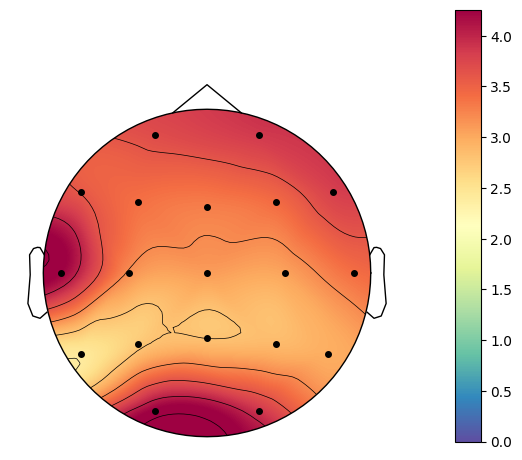

In [121]:
# extract power for one main.disorder and one band
test =  main_mean.loc['Schizophrenia', 'gamma']
# make sure that channels are in correct order
assert (test.index == channels.index).all()
# plot
fig, ax = plt.subplots()
plot_eeg(test, channels.to_numpy(), ax, fig, vmin=0, marker_style={'markersize':4, 'markerfacecolor':'black'})
plt.show()

In [122]:
def plot_eeg_dataset(dataset, channels, gwidth=2, gheight=1.5, wspace=0,
                     marker_style={'markersize': 2, 'markerfacecolor': 'black'},
                     band_ordered=None, conditions_ordered=None, band_labels=None,
                     condition_labels=None, **kwargs):
    """
    Visualisation of pre-processed EEG dataset.
    See example of usage on Kaggle (https://www.kaggle.com/code/lazygene/visualising-pre-processed-eeg-data)
    :param dataset: pandas.DataFrame
        Data set to visualise. See format of the dataset on Kaggle (url above).
    :param channels: pandas.DataFrame
        Channel (index) names and positions (columns: x and y).
    :param gwidth: float
        Width of single topology map.
    :param gheight: float
        Height of single topology map.
    :param wspace: float
        Space between subplots
    :param marker_style:
        marker_style: dict
        Additional plotting parameters for plotting significant sensors. Default (None) equals:
        dict(marker='o', markerfacecolor='black', markeredgecolor='k', linewidth=0, markersize=2)
    :param band_ordered: list | None
        List of EEG bands (e.g. delta, gamma, etc.), they must be one or more columns of dataset DataFrame.
        Provides a way to control the order (form top to bottom) of bands in the resulted complex figure.
        If None, all columns of dataset are used in orfer of columns.
    :param conditions_ordered: list | None
        List of conditions, they must be one or more level 0 indecies of dataset DataFrame.
        Provides a way to control the order (from left to right) of conditions in the resulted complex figure.
        If None, all unique 0 level indecies of dataset are used in order they are in the dataset.
    :param band_labels: list | None
        List of custom labels for EEG bands, it must be the same length as band_ordered.
        If None, column names of dataset DataFrame are used.
    :param condition_labels:
        List of custom labels for conditions, it must be the same length as conditions_ordered.
        If None, original indecies' names of dataset DataFrame are used.
    :param kwargs:
        any other parameter used in plot_eeg
    :return: fig: matplotlib.figure.Figure
    :return: subfigs: np.array of matplotlib.figure.Figure elements
    """
    if band_ordered is None:
        band_ordered = dataset.columns
    if conditions_ordered is None:
        conditions_ordered = dataset.index.get_level_values(0).unique()
    if band_labels is None:
        band_labels = band_ordered
    if condition_labels is None:
        condition_labels = conditions_ordered
    # number of rows in figure
    nrows = len(band_ordered)
    # number of columns in figure
    ncols = len(conditions_ordered)
    # create figure with width gwidth and gheight per graph
    fig = plt.figure(constrained_layout=True, figsize=(gwidth*ncols, gheight*nrows))
    # create subfigures
    subfigs = fig.subfigures(nrows, ncols, wspace=wspace)
    # loop through subfigures
    for ind, subfig in np.ndenumerate(subfigs):
        i, j = ind
        # select band (column name in main_mean)
        band = band_ordered[i]
        # select disorder (row name in main_mean)
        disorder = conditions_ordered[j]
        # select band levels for disorder
        levels = dataset.loc[disorder, band]
        # calculate maximum (vmax) for easier comparison between disorders
        vmax = ceil(max(dataset[band]))
        # create axes
        ax = subfig.subplots()
        # plot eeg
        plot_eeg(levels, channels.to_numpy(), ax, subfig, vmin=0, vmax=vmax, marker_style=marker_style, **kwargs)
        # annotate band (if needed)
        if j == 0:
            ax.set_ylabel(band_labels[i])
        # annotate disorder (if needed)
        if i == 0:
            subfig.suptitle(condition_labels[j], y=1.3)
    return fig, subfigs

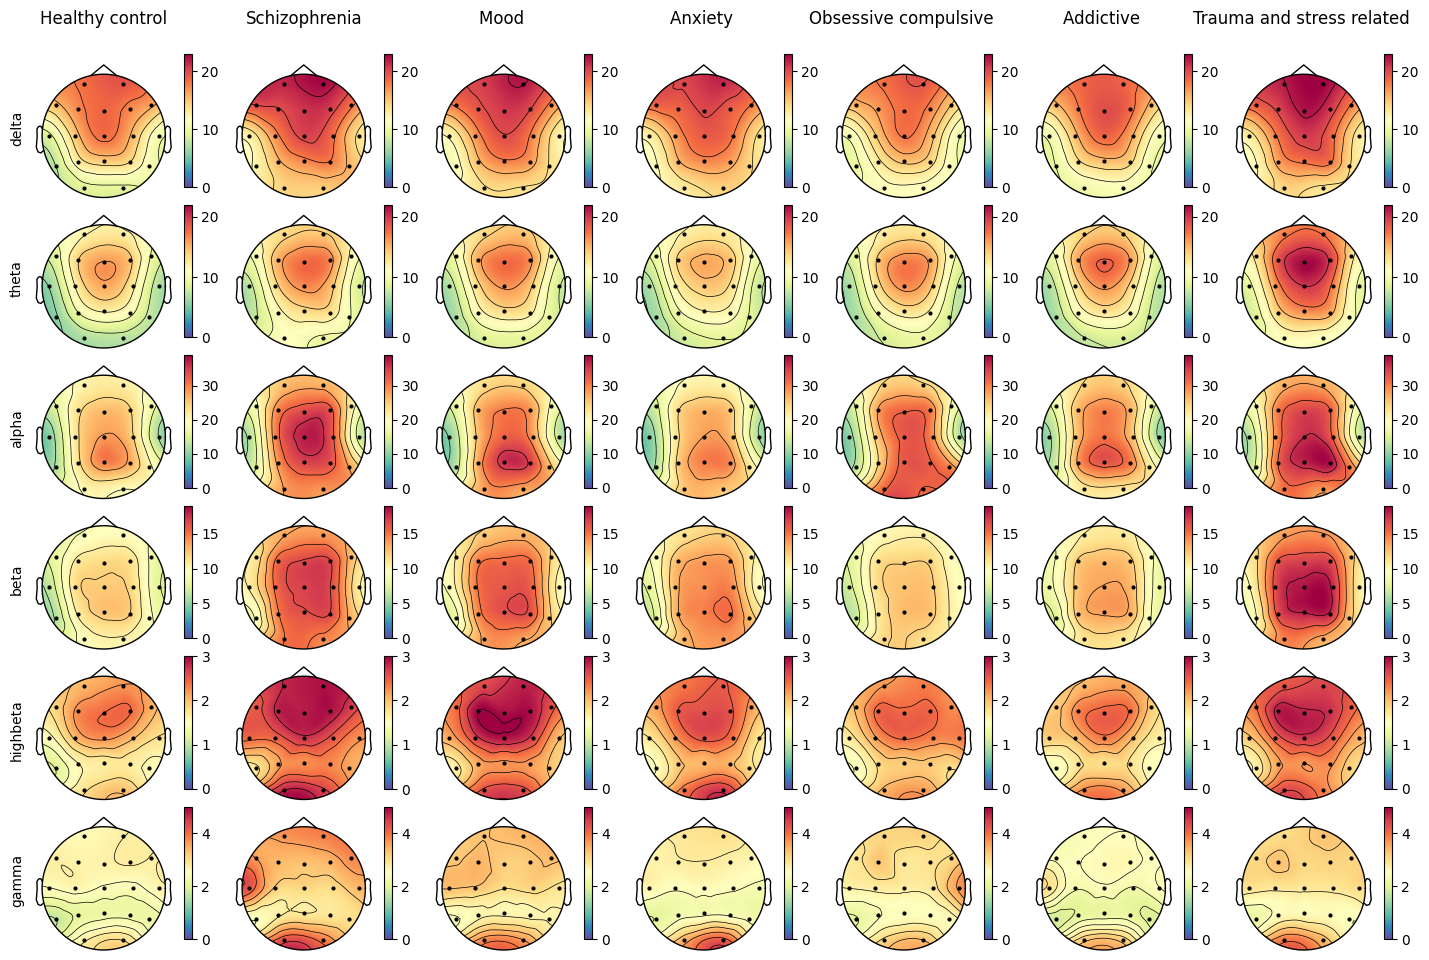

In [123]:
# order conditions (main.disorder)
conds = ['Healthy control',
         'Schizophrenia', 
         'Mood disorder', 
         'Anxiety disorder',  
         'Obsessive compulsive disorder', 
         'Addictive disorder',
         'Trauma and stress related disorder']
conds_labs = [x.replace('disorder', '') for x in conds]
plot_eeg_dataset(main_mean, channels, conditions_ordered=conds, condition_labels=conds_labs)
plt.show()

# GRAPH 2

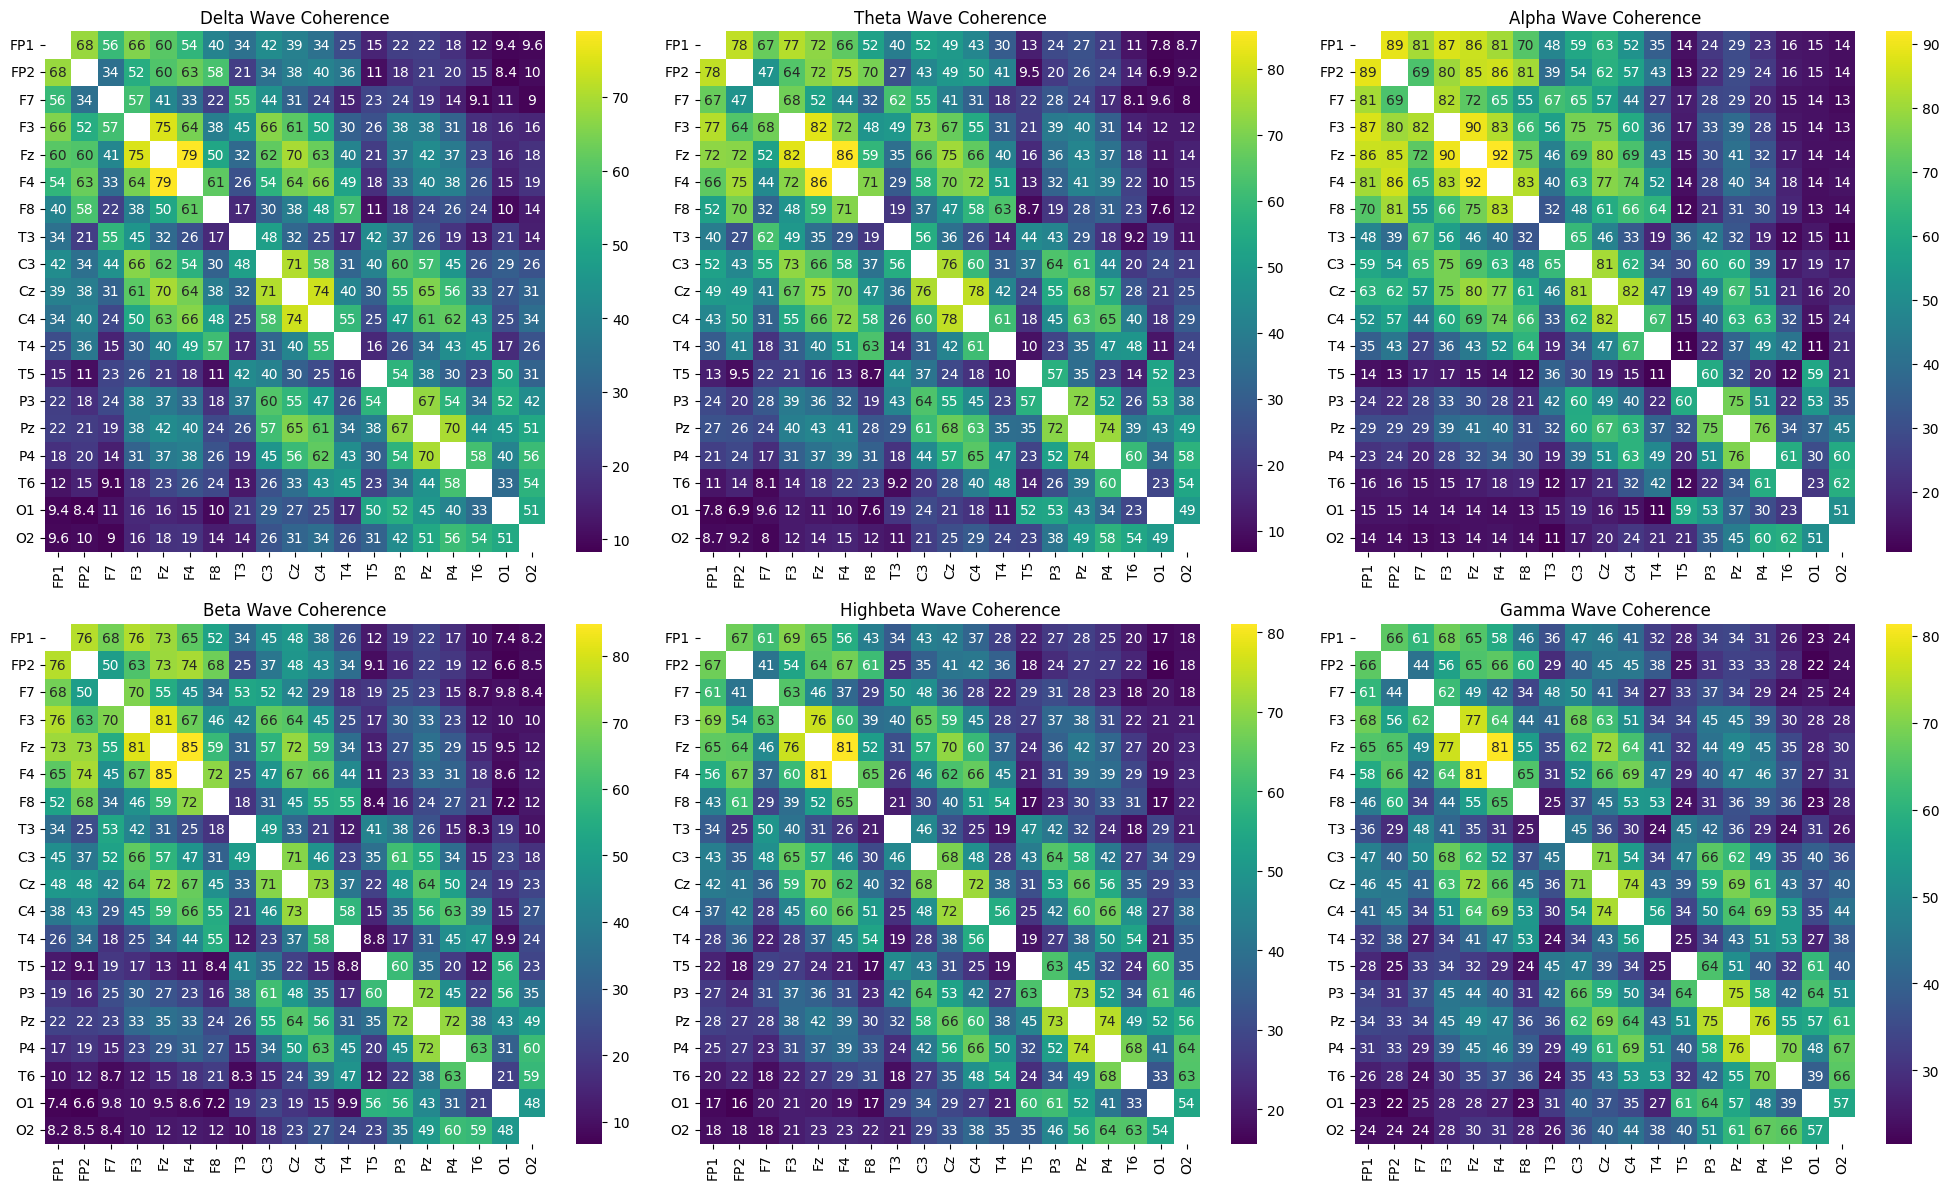

In [135]:

df_graph2 = df
df_graph2.head()
#Keep Only the Connectivity Columns
df_graph2 = df_graph2.filter(like='COH')
df_graph2.head()

#Test: 
# List of channels
channels = [
    'FP1', 'FP2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'T3', 'C3', 'Cz', 'C4', 
    'T4', 'T5', 'P3', 'Pz', 'P4', 'T6', 'O1', 'O2'
]
# List of wave types
wave_types = ['delta', 'theta', 'alpha', 'beta', 'highbeta', 'gamma']

# Function to plot coherence matrix for a given wave type
def plot_wave_coherence(df, wave_type, channels, ax):
    # Initialize an empty DataFrame for the coherence matrix
    coh_matrix = pd.DataFrame(np.nan, index=channels, columns=channels)

    # Filter columns for the given wave type
    wave_columns = [col for col in df.columns if f'.{wave_type}.' in col]

    # Populate the coherence matrix
    for col in wave_columns:
        parts = col.split('.')
        if len(parts) == 7:
            region1 = parts[4]
            region2 = parts[6]
            mean_coherence = df[col].mean()  # Use the mean value directly from df
            coh_matrix.loc[region1, region2] = mean_coherence
            coh_matrix.loc[region2, region1] = mean_coherence  # Ensure symmetry

    # Plot the heatmap
    sns.heatmap(coh_matrix, annot=True, cmap='viridis', xticklabels=channels, yticklabels=channels, ax=ax)
    ax.set_title(f'{wave_type.capitalize()} Wave Coherence')

# Set up the subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 12))

# Plot each wave type's coherence matrix
for wave_type, ax in zip(wave_types, axes.flat):
    plot_wave_coherence(df, wave_type, channels, ax)

plt.tight_layout()
plt.show()

# GRAPH 3

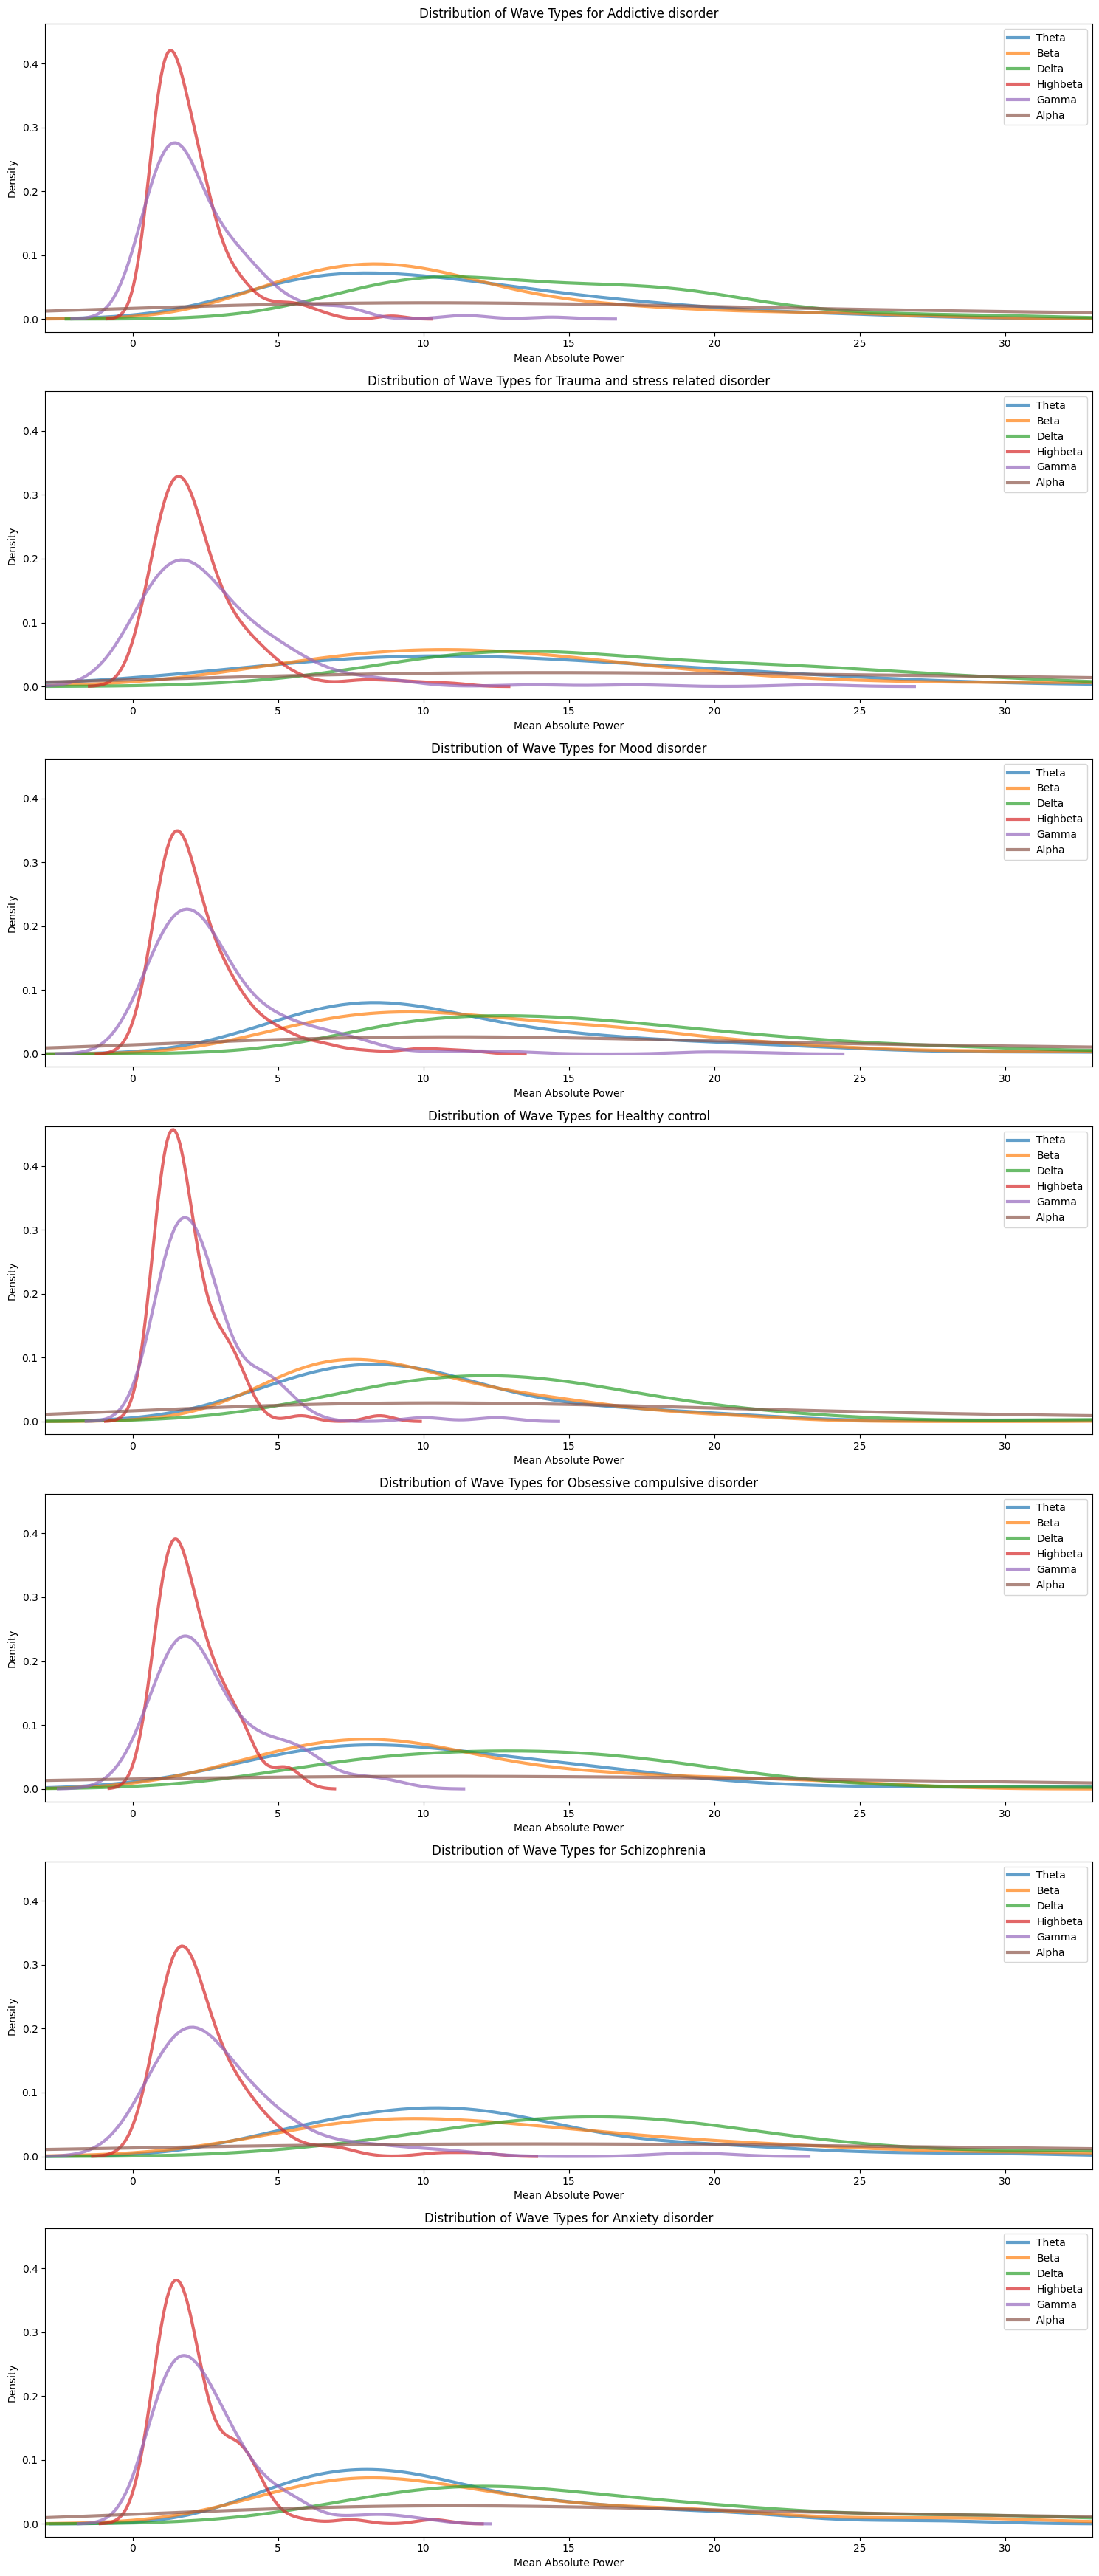

In [124]:
# Filter columns that start with "AB"
ab_columns = [col for col in df.columns if col.startswith('AB')]

# define wave types
def get_wave_type(col_name):
    parts = col_name.split('.')
    return parts[2] if len(parts) > 2 else 'unknown'
wave_types = {col: get_wave_type(col) for col in ab_columns}
# Plotting function
def calculate_mean(df):
    wave_summaries = {}
    for wave_type in set(wave_types.values()):
        cols_to_plot = [col for col, wave in wave_types.items() if wave == wave_type]
        if cols_to_plot:
            wave_summaries[wave_type] = df[cols_to_plot].mean(axis=1)
    return wave_summaries

fig, axes = plt.subplots(7, 1, figsize=(15, 35))
# Iterate over each main.disorder
for i, disorder in enumerate(df['main.disorder'].unique()):
    df_disorder = df[df['main.disorder'] == disorder]
    wave_summaries = calculate_mean(df_disorder)
    
    for wave_type, values in wave_summaries.items():
        sns.kdeplot(values, label=wave_type.capitalize(), fill=False, alpha=0.7, ax=axes[i], linewidth=3)
    axes[i].set_xlim(-3, 33)  
    axes[i].set_ylim(-0.02, 0.462)
    axes[i].set_title(f'Distribution of Wave Types for {disorder}')
    axes[i].set_xlabel('Mean Absolute Power')
    axes[i].set_ylabel('Density')
    axes[i].legend()

plt.tight_layout()
plt.show()

# Data Analysis & Results

* Include cells that describe the steps in your data analysis.
* You'll likely also have some visualizations here as well.

In [125]:
## YOUR CODE HERE
## FEEL FREE TO ADD MULTIPLE CELLS PER SECTION

## PCA and Clustering

# Conclusion & Discussion

* Discussion of your results and how they address your experimental question(s).
* Discussed limitations of your analyses.
* You can also discuss future directions you'd like to pursue.